In [2]:
#imports
import tensorflow as ts
import keras as ks
import matplotlib.pyplot as plt
import numpy as np
import time
import random

from numpy.random import seed
from random import randint
from keras.datasets import mnist
from keras.layers import Dense,Activation,Conv2D,MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.models import Model, Input
from keras.utils import to_categorical,np_utils
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image

def done():
    print("DONE")
def nl():
    print("")
    
done()

Using TensorFlow backend.


DONE


In [3]:
#magic numbers
seed(42)
#nr_classes=10
#class_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#nr_neurons_in_layer=10
my_optimizer=Adam()
my_batch_size=128
(pixels_ox,pixels_oy)=(300,200)
my_epochs=1


done()

DONE


In [8]:
training_path=('customdataset/train')
validating_path=('customdataset/valid')
testing_path=('customdataset/test')
train_batches=ImageDataGenerator().flow_from_directory(training_path, target_size=(pixels_ox,pixels_oy),classes=['face','motorbike','watch'], batch_size=16)
valid_batches=ImageDataGenerator().flow_from_directory(validating_path, target_size=(pixels_ox,pixels_oy),classes=['face','motorbike','watch'], batch_size=16)
test_batches=ImageDataGenerator().flow_from_directory(testing_path, target_size=(pixels_ox,pixels_oy),classes=['face','motorbike','watch'], batch_size=16)
done()




Found 1472 images belonging to 3 classes.
Found 367 images belonging to 3 classes.
Found 145 images belonging to 3 classes.
DONE


In [9]:
train_images,train_labels=next(train_batches)
test_images,test_labels=next(test_batches)
print(train_images.shape)
print(train_labels.shape)
done()

(16, 300, 200, 3)
(16, 3)
DONE


DONE


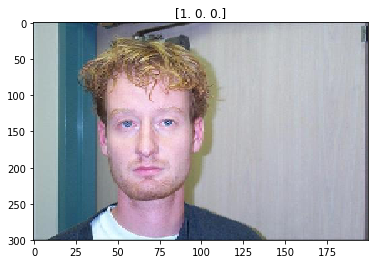

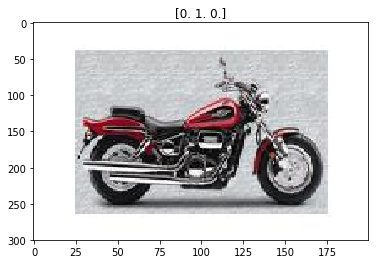

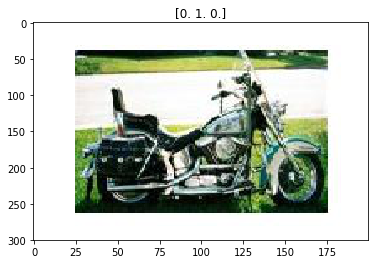

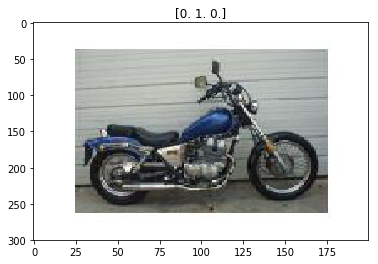

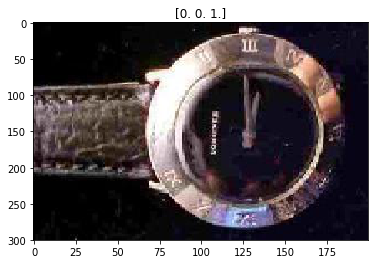

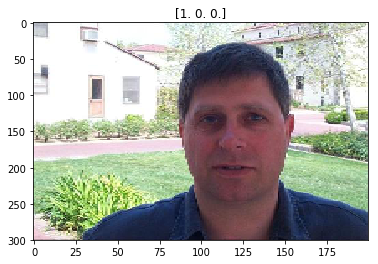

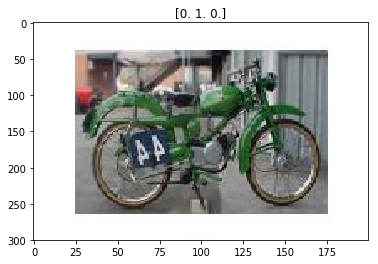

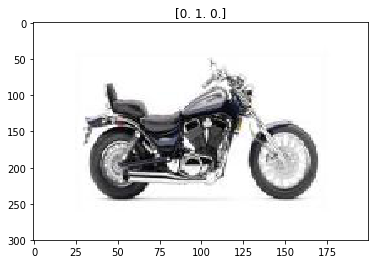

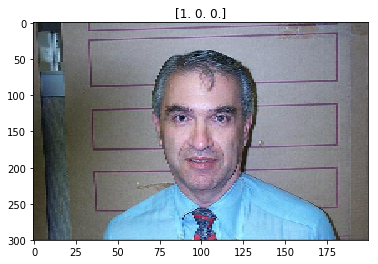

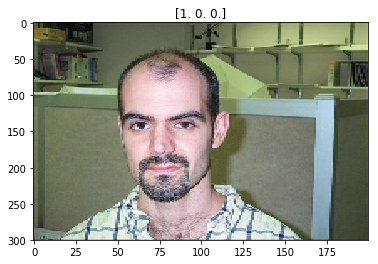

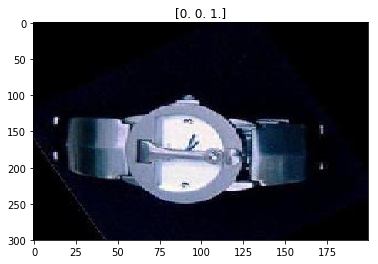

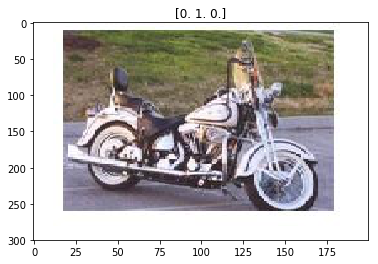

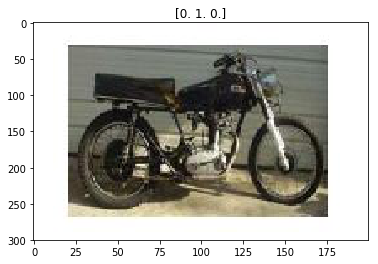

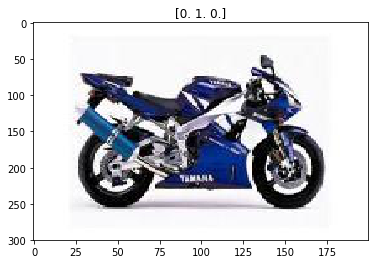

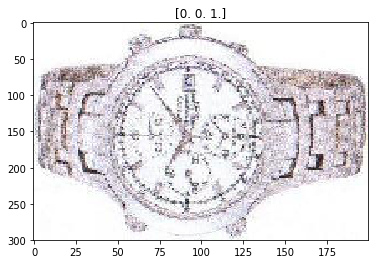

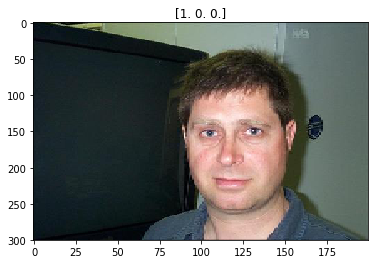

In [10]:

for image,label in zip(train_images,train_labels):
    my_image=image.copy()
    my_image/=255
    plt.figure()    
    plt.title(label)
    plt.imshow(my_image,aspect='auto')
    
done()

In [27]:
base_model=ks.applications.vgg16.VGG16()

#base_model.summary()

print("")
print("")
print("")

base_model.layers.pop()
#base_model.summary()

print("")
print("")
print("")

#easier way to do this?
output=Dense(3,activation='softmax')(base_model.layers[-1].output)

new_model=Model(base_model.input,output)

new_model.summary()

print("")
print("")
print("")
#print(new_model.input)
#print(new_model.output)
#print(new_model.layers[-1].input)
#print(new_model.layers[-1].output)

#how do you search for a particular layer, especially if it's multi input/multi output?







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
____

In [28]:
#COMPILATION
new_model.compile(loss="categorical_crossentropy", optimizer=my_optimizer, metrics=['accuracy'])

done()

DONE


In [29]:
new_model.fit_generator(train_batches,
             epochs=my_epochs,
             validation_data=valid_batches,
             verbose=1)

Epoch 1/1
92/92 [==============================] - 1728s 19s/step - loss: 11.3029 - acc: 0.2935 - val_loss: 11.4188 - val_acc: 0.2916


In [40]:
train_score = new_model.evaluate(train_images, train_labels)
test_score = new_model.evaluate(test_images,test_labels)
print("accuracy: ",train_score[1])
print("accuracy: ",test_score[1])


16/16 [==============================] - 5s 326ms/step
accuracy:  0.4375
accuracy:  0.25
